In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")
y_train = y_train['Class']

In [ ]:
param_grid = {'n_neighbors': range(3, 11)}

In [ ]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn,
             param_grid=param_grid,
             scoring='accuracy',
             cv=4,
             verbose=5)
grid.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV 1/4] END .....................n_neighbors=3;, score=0.758 total time=  13.1s
[CV 2/4] END .....................n_neighbors=3;, score=0.754 total time=  12.9s
[CV 3/4] END .....................n_neighbors=3;, score=0.757 total time=  12.6s
[CV 4/4] END .....................n_neighbors=3;, score=0.755 total time=  12.5s
[CV 1/4] END .....................n_neighbors=4;, score=0.757 total time=  14.2s
[CV 2/4] END .....................n_neighbors=4;, score=0.755 total time=  13.9s
[CV 3/4] END .....................n_neighbors=4;, score=0.752 total time=  14.0s
[CV 4/4] END .....................n_neighbors=4;, score=0.757 total time=  13.6s
[CV 1/4] END .....................n_neighbors=5;, score=0.780 total time=  14.5s
[CV 2/4] END .....................n_neighbors=5;, score=0.781 total time=  14.3s
[CV 3/4] END .....................n_neighbors=5;, score=0.779 total time=  14.6s
[CV 4/4] END .....................n_neighbors=5;,

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 11)}, scoring='accuracy',
             verbose=5)

In [ ]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [ ]:
grid.best_score_

0.8040151326272796

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[2357,  113,  871],
       [ 367,  187,  741],
       [ 479,   99, 8298]])

<Axes: >

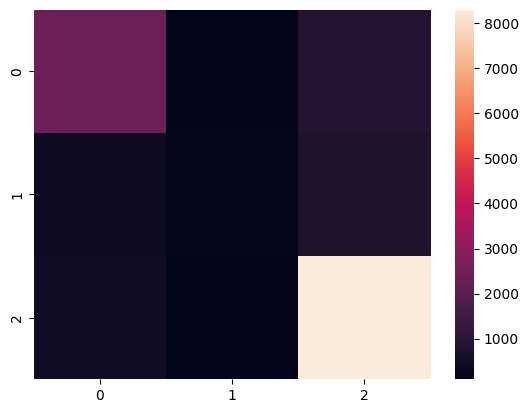

In [ ]:
sns.heatmap(mat)